<a href="https://colab.research.google.com/github/Jacqueline-Lim/HeartDiseasePrediction/blob/main/Jacqueline%20Lim%20(Part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

X_train = pd.read_csv('/content/Assignment/x_train.csv')
X_valid = pd.read_csv('/content/Assignment/x_valid.csv')
X_test = pd.read_csv('/content/Assignment/x_test.csv')

y_train = pd.read_csv('/content/Assignment/y_train.csv')
y_valid = pd.read_csv('/content/Assignment/y_valid.csv')
y_test = pd.read_csv('/content/Assignment/y_test.csv')

# Model 1: Naive_bayes


Naives Bayes Evaluation for Training Set:

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       393
         1.0       0.82      0.87      0.84       422

    accuracy                           0.83       815
   macro avg       0.83      0.83      0.83       815
weighted avg       0.83      0.83      0.83       815


Naives Bayes Evaluation for Validation Set:

              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79        56
         1.0       0.71      0.89      0.79        45

    accuracy                           0.79       101
   macro avg       0.80      0.80      0.79       101
weighted avg       0.81      0.79      0.79       101


Naives Bayes Evaluation for Testing Set:

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        45
         1.0       0.88      0.90      0.89        58

    accuracy                           0.87      

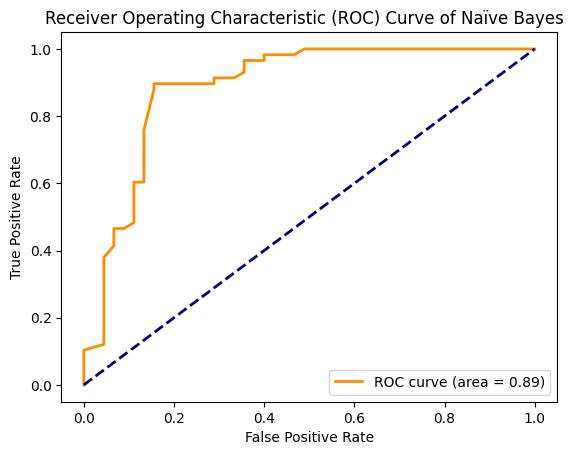

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train, y_train['target'])

#classification_report
y_train_pred = naive_bayes_model.predict(X_train)
print("\nNaives Bayes Evaluation for Training Set:\n")
print(classification_report(y_train['target'], y_train_pred))

y_valid_pred = naive_bayes_model.predict(X_valid)
print("\nNaives Bayes Evaluation for Validation Set:\n")
print(classification_report(y_valid['target'], y_valid_pred))

y_test_pred = naive_bayes_model.predict(X_test)
print("\nNaives Bayes Evaluation for Testing Set:\n")
print(classification_report(y_test['target'], y_test_pred))

#confusion_matrix
cm= confusion_matrix(y_train['target'],y_train_pred)
print("Confusion Matrix on training set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred)
print("Confusion Matrix on testing set:")
print(cm)

y_test_prob = naive_bayes_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = auc(fpr1, tpr1)

# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naïve Bayes  ')
plt.legend(loc='lower right')
plt.show()


# Model 2: K-Nearest-Neighbours (KNN)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': np.int64(8), 'leaf_size': np.int64(35), 'algorithm': 'kd_tree'}

KNN Evaluation for Training Set:

              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74       393
         1.0       0.77      0.68      0.72       422

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.74      0.73      0.73       815


KNN Evaluation for Validation Set:

              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70        56
         1.0       0.62      0.67      0.65        45

    accuracy                           0.67       101
   macro avg       0.67      0.67      0.67       101
weighted avg       0.68      0.67      0.67       101


KNN Evaluation for Testing Set:

              precision    recall  f1-score   

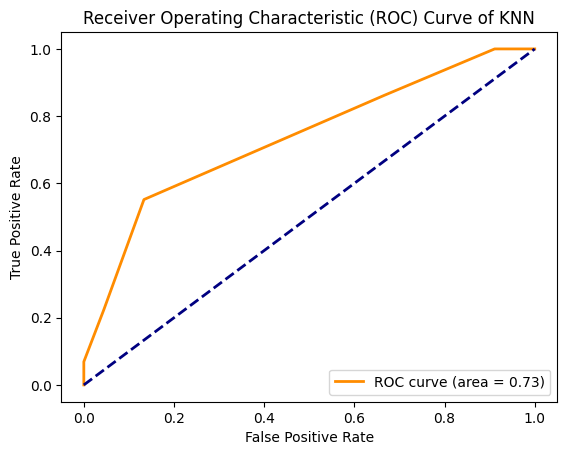

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_dist = {
    'n_neighbors': np.arange(5, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': np.arange(20, 51, 5),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train, y_train['target'])

# Use the best model found
knn_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

#classification_report
y_train_pred = knn_model.predict(X_train)
print("\nKNN Evaluation for Training Set:\n")
print(classification_report(y_train['target'], y_train_pred))

y_valid_pred = knn_model.predict(X_valid)
print("\nKNN Evaluation for Validation Set:\n")
print(classification_report(y_valid['target'], y_valid_pred))

y_test_pred = knn_model.predict(X_test)
print("\nKNN Evaluation for Testing Set:\n")
print(classification_report(y_test['target'], y_test_pred))

#confusion_matrix
cm = confusion_matrix(y_train['target'], y_train_pred)
print("Confusion Matrix on training set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred)
print("Confusion Matrix on validation set:")
print(cm)

cm = confusion_matrix(y_test['target'], y_test_pred)
print("Confusion Matrix on testing set:")
print(cm)

y_test_prob = knn_model.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend(loc='lower right')
plt.show()

# Model 3: Support Vector Machine (SVM)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=67. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}

Support Vector Machine Evaluation for Train Set:

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82       393
         1.0       0.81      0.91      0.85       422

    accuracy                           0.84       815
   macro avg       0.85      0.84      0.84       815
weighted avg       0.84      0.84      0.84       815


Support Vector Machine Evaluation for Valid Set:

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.82        56
         1.0       0.73      0.96      0.83        45

    accuracy                           0.82       101
   macro avg       0.84      0.83      0.82       101
weighted avg       0.85      0.82      0.82       101


Support Vector Machine Evaluation for Test Set:

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        45
         1.0       0.

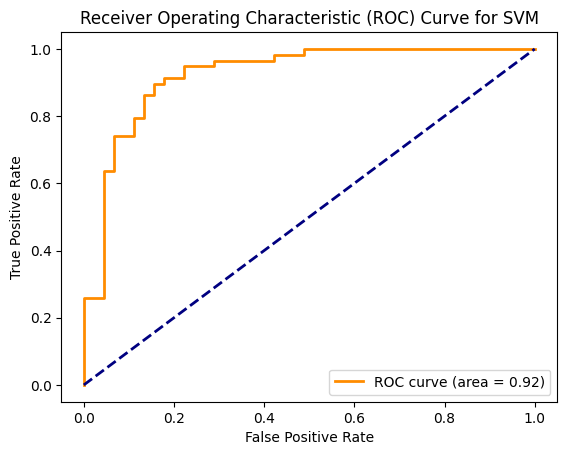

In [ ]:
from sklearn import svm
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import loguniform, randint, uniform

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
}

svm = svm.SVC(probability=True)

search = HalvingRandomSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    factor=3,
    cv=3,
    aggressive_elimination=True,
    n_jobs=-1
)

search.fit(X_train, y_train['target'])
print("Best parameters:", search.best_params_)

best_svm = search.best_estimator_

y_train_pred_svm = best_svm.predict(X_train)
print("\nSupport Vector Machine Evaluation for Train Set:\n")
print(classification_report(y_train['target'], y_train_pred_svm))

y_valid_pred_svm = best_svm.predict(X_valid)
print("\nSupport Vector Machine Evaluation for Valid Set:\n")
print(classification_report(y_valid['target'], y_valid_pred_svm))

y_test_pred_svm = best_svm.predict(X_test)
print("\nSupport Vector Machine Evaluation for Test Set:\n")
print(classification_report(y_test['target'], y_test_pred_svm))

cm= confusion_matrix(y_train['target'],y_train_pred_svm)
print("Confusion Matrix on train set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred_svm)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred_svm)
print("Confusion Matrix on test set:")
print(cm)

y_scores = best_svm.predict_proba(X_test)[:, 1]
fpr3, tpr3, thresholds = roc_curve(y_test['target'], y_scores)
roc_auc = auc(fpr3, tpr3)

# Plot ROC curve
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()

# Model 4: Decision Tree

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}

Decision Tree Evaluation for Train Set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       393
         1.0       1.00      1.00      1.00       422

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815
weighted avg       1.00      1.00      1.00       815


Decision Tree Evaluation for Valid Set:

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        56
         1.0       0.96      0.96      0.96        45

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101


Decision Tree Evaluation for Test Set:

      

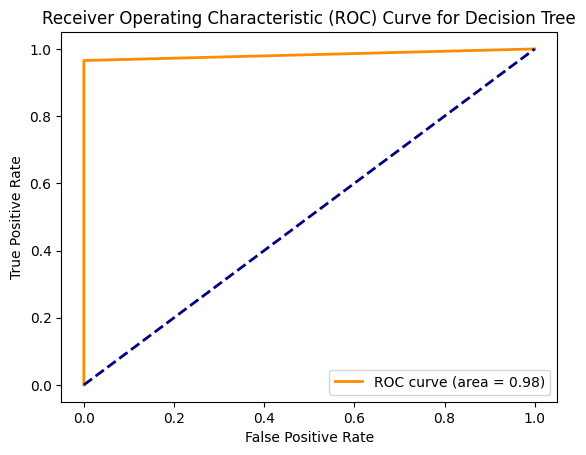

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

decision_tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train['target'])

print("Best parameters found: ", random_search.best_params_)
best_decision_tree = random_search.best_estimator_


y_train_pred_dt = best_decision_tree.predict(X_train)
print("\nDecision Tree Evaluation for Train Set:\n")
print(classification_report(y_train['target'], y_train_pred_dt))

y_valid_pred_dt = best_decision_tree.predict(X_valid)
print("\nDecision Tree Evaluation for Valid Set:\n")
print(classification_report(y_valid['target'], y_valid_pred_dt))

y_test_pred_dt = best_decision_tree.predict(X_test)
print("\nDecision Tree Evaluation for Test Set:\n")
print(classification_report(y_test['target'], y_test_pred_dt))

cm= confusion_matrix(y_train['target'],y_train_pred_dt)
print("Confusion Matrix on train set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred_dt)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred_dt)
print("Confusion Matrix on test set:")
print(cm)

y_scores = best_decision_tree.predict_proba(X_test)[:, 1]
fpr4, tpr4, thresholds = roc_curve(y_test['target'], y_scores)
roc_auc = auc(fpr4, tpr4)

# Plot ROC curve
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Model 5: Linear Discriminant Analysis


Linear Discriminant Analysis Evaluation for Train Set:

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82       393
         1.0       0.80      0.91      0.85       422

    accuracy                           0.84       815
   macro avg       0.84      0.83      0.83       815
weighted avg       0.84      0.84      0.83       815


Linear Discriminant Analysis Evaluation for Valid Set:

              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78        56
         1.0       0.70      0.93      0.80        45

    accuracy                           0.79       101
   macro avg       0.81      0.81      0.79       101
weighted avg       0.83      0.79      0.79       101


Linear Discriminant Analysis Evaluation for Test Set:

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84        45
         1.0       0.87      0.90      0.88        58

    accuracy

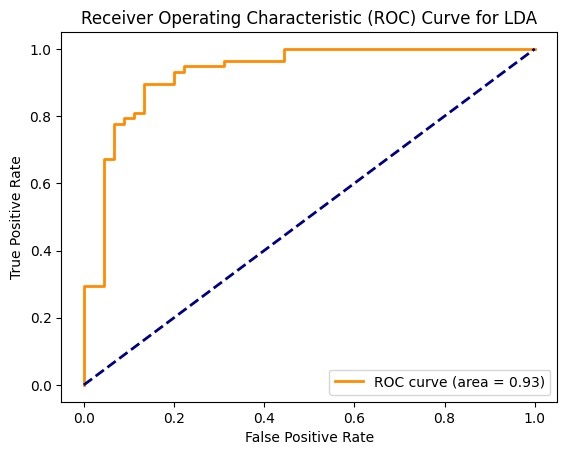

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train['target'])

y_train_pred_lda = lda_model.predict(X_train)
print("\nLinear Discriminant Analysis Evaluation for Train Set:\n")
print(classification_report(y_train['target'], y_train_pred_lda))

y_valid_pred_lda = lda_model.predict(X_valid)
print("\nLinear Discriminant Analysis Evaluation for Valid Set:\n")
print(classification_report(y_valid['target'], y_valid_pred_lda))

y_test_pred_lda = lda_model.predict(X_test)
print("\nLinear Discriminant Analysis Evaluation for Test Set:\n")
print(classification_report(y_test['target'], y_test_pred_lda))

cm= confusion_matrix(y_train['target'],y_train_pred_lda)
print("Confusion Matrix on train set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred_lda)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred_lda)
print("Confusion Matrix on test set:")
print(cm)

y_scores = lda_model.predict_proba(X_test)[:, 1]
fpr5, tpr5, thresholds = roc_curve(y_test['target'], y_scores)
roc_auc = auc(fpr5, tpr5)

# Plot ROC curve
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LDA')
plt.legend(loc='lower right')
plt.show()

# Model 6: Quadratic Discriminant Analysis


Quadratic Discriminant Analysis Evaluation for Train Set:

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.84       393
         1.0       0.83      0.92      0.87       422

    accuracy                           0.86       815
   macro avg       0.86      0.86      0.86       815
weighted avg       0.86      0.86      0.86       815


Quadratic Discriminant Analysis Evaluation for Valid Set:

              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77        56
         1.0       0.69      0.89      0.78        45

    accuracy                           0.77       101
   macro avg       0.79      0.78      0.77       101
weighted avg       0.80      0.77      0.77       101


Quadratic Discriminant Analysis Evaluation for Test Set:

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        45
         1.0       0.86      0.88      0.87        58

   

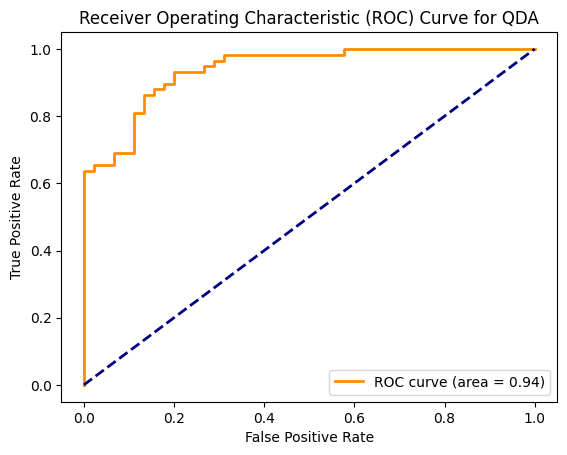

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model=QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train['target'])

y_train_pred_qda = qda_model.predict(X_train)
print("\nQuadratic Discriminant Analysis Evaluation for Train Set:\n")
print(classification_report(y_train['target'], y_train_pred_qda))

y_valid_pred_qda = qda_model.predict(X_valid)
print("\nQuadratic Discriminant Analysis Evaluation for Valid Set:\n")
print(classification_report(y_valid['target'], y_valid_pred_qda))

y_test_pred_qda = qda_model.predict(X_test)
print("\nQuadratic Discriminant Analysis Evaluation for Test Set:\n")
print(classification_report(y_test['target'], y_test_pred_qda))

cm= confusion_matrix(y_train['target'],y_train_pred_qda)
print("Confusion Matrix on train set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred_qda)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred_qda)
print("Confusion Matrix on test set:")
print(cm)

y_scores = qda_model.predict_proba(X_test)[:, 1]
fpr6, tpr6, thresholds = roc_curve(y_test['target'], y_scores)
roc_auc = auc(fpr6, tpr6)

# Plot ROC curve
plt.figure()
plt.plot(fpr6, tpr6, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for QDA')
plt.legend(loc='lower right')
plt.show()

# Model 7: Random Forest


Train Set Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       393
         1.0       1.00      1.00      1.00       422

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815
weighted avg       1.00      1.00      1.00       815


Train Set Confusion Matrix: 
[[393   0]
 [  0 422]]

Validation Set Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        56
         1.0       0.98      1.00      0.99        45

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Validation Set Confusion Matrix: 
[[55  1]
 [ 0 45]]

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        45
         1.0       0.97      1.00      0.98        58

  

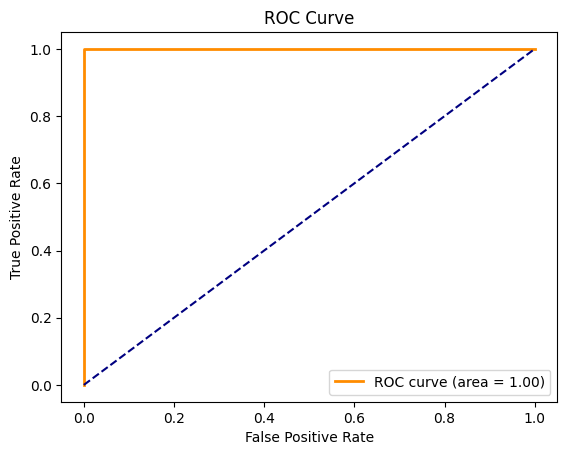

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train['target'])

y_train_pred = rf.predict(X_train)
y_valid_pred = rf.predict(X_valid)
y_test_pred = rf.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"\n{name} Confusion Matrix: ")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

# Print classification reports and confusion matrix
evaluate_model("Train Set", y_train['target'], y_train_pred)
evaluate_model("Validation Set", y_valid['target'], y_valid_pred)
evaluate_model("Test Set", y_test['target'], y_test_pred)

#Print the ROC curve and AUC score
y_test_prob = rf.predict_proba(X_test)[:, 1]
fpr7, tpr7, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = roc_auc_score(y_test['target'], y_test_prob)
plt.plot(fpr7,tpr7, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

     Feature  Importance
2         cp    0.133326
9    oldpeak    0.110133
11        ca    0.107541
12      thal    0.103305
7    thalach    0.102190
0        age    0.093222
4       chol    0.074591
8      exang    0.066955
3   trestbps    0.063926
10     slope    0.044954
1        sex    0.037553
6    restecg    0.021044
5        fbs    0.007969


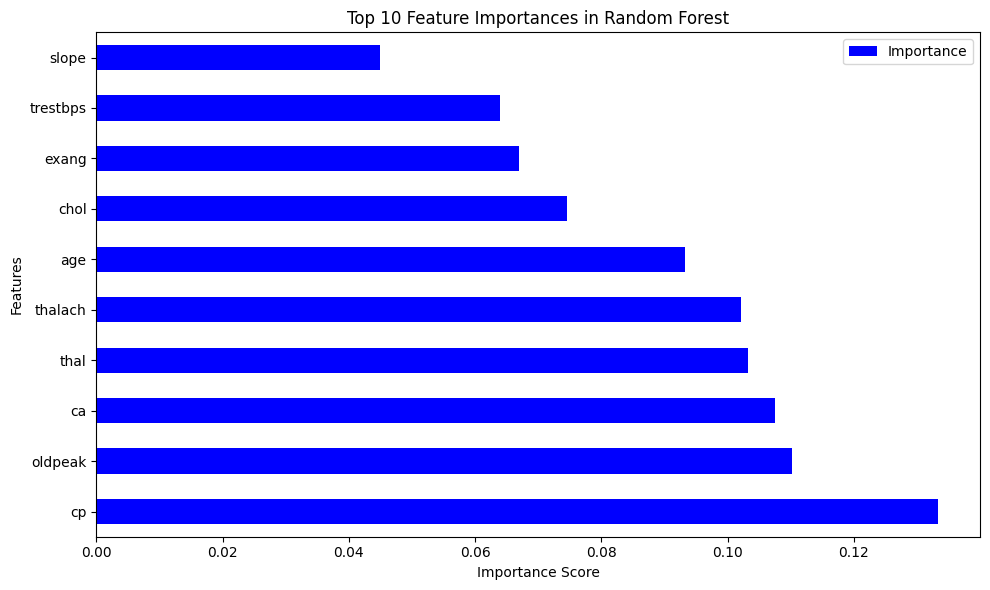

In [ ]:
feature = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ]
f_imp = rf.feature_importances_
f_imp = f_imp[1:]
df = pd.DataFrame({'Feature': feature, 'Importance': f_imp})

df_sorted = df.sort_values(by='Importance', ascending=False)
print(df_sorted)

df_sorted.head(10).plot(kind='barh',  x='Feature', y='Importance', figsize=(10,6), color='blue')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Model 8: Logistic Regression


Train Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82       393
         1.0       0.81      0.88      0.85       422

    accuracy                           0.83       815
   macro avg       0.84      0.83      0.83       815
weighted avg       0.84      0.83      0.83       815


Train Set Confusion Matrix: 
[[308  85]
 [ 50 372]]

Validation Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.80        56
         1.0       0.73      0.89      0.80        45

    accuracy                           0.80       101
   macro avg       0.81      0.81      0.80       101
weighted avg       0.82      0.80      0.80       101


Validation Set Confusion Matrix: 
[[41 15]
 [ 5 40]]

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        45
         1.0       0.89      0.86      0.88        58

  

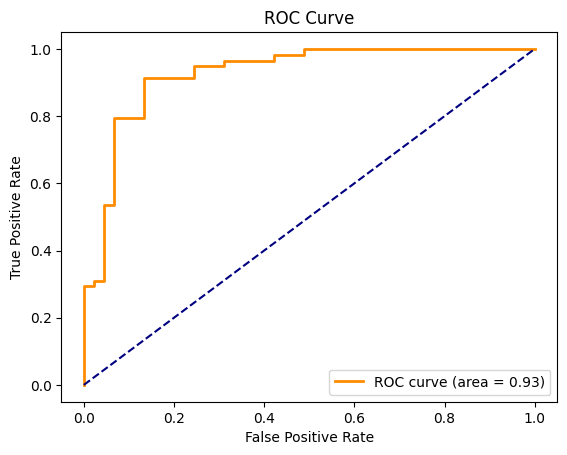

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train, y_train['target'])

y_train_pred = logReg.predict(X_train)
y_valid_pred = logReg.predict(X_valid)
y_test_pred = logReg.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Set Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"\n{name} Set Confusion Matrix: ")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

#Print the classification report and confusion metrix
evaluate_model("Train", y_train['target'], y_train_pred)
evaluate_model("Validation", y_valid['target'], y_valid_pred)
evaluate_model("Test", y_test['target'], y_test_pred)

#Print the ROC curve and AUC score
y_test_prob = logReg.predict_proba(X_test)[:, 1]
fpr8, tpr8, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = roc_auc_score(y_test['target'], y_test_prob)
plt.plot(fpr8,tpr8, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Model 9: Neural Network

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'relu'}

Train Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       393
         1.0       0.82      0.85      0.83       422

    accuracy                           0.82       815
   macro avg       0.82      0.82      0.82       815
weighted avg       0.82      0.82      0.82       815


Train Set Confusion Matrix: 
[[313  80]
 [ 65 357]]

Validation Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77        56
         1.0       0.71      0.80      0.75        45

    accuracy                           0.76       101
   macro avg       0.76      0.77      0.76       101
weighted avg       0.77      0.76      0.76       101


Validation Set Confusion Matrix: 
[[41 15]
 [ 9 3

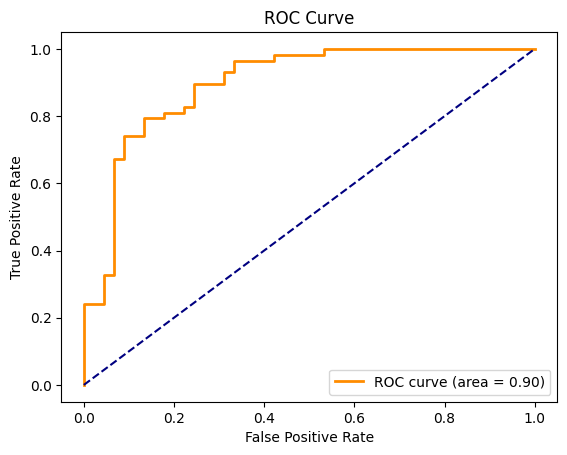

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42, max_iter=1000),
                                   param_distributions=param_grid, n_iter=10,
                                   cv=3, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train['target'])
nn_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_train_pred = nn_model.predict(X_train)
y_valid_pred = nn_model.predict(X_valid)
y_test_pred = nn_model.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"\n{name} Confusion Matrix: ")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

#print the classification report and confusion matrix
evaluate_model("Train Set", y_train['target'], y_train_pred)
evaluate_model("Validation Set", y_valid['target'], y_valid_pred)
evaluate_model("Test Set", y_test['target'], y_test_pred)

#Print the ROC curve and AUC score
y_test_prob = nn_model.predict_proba(X_test)[:, 1]
fpr9, tpr9, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = roc_auc_score(y_test['target'], y_test_prob)
plt.plot(fpr9,tpr9, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Model 10: Gradient Boosting Classfier


Train Set Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       393
         1.0       0.99      1.00      0.99       422

    accuracy                           0.99       815
   macro avg       0.99      0.99      0.99       815
weighted avg       0.99      0.99      0.99       815


Train Confusion Matrix: 
[[388   5]
 [  1 421]]

Validation Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        56
         1.0       0.90      0.98      0.94        45

    accuracy                           0.94       101
   macro avg       0.94      0.94      0.94       101
weighted avg       0.94      0.94      0.94       101


Validation Confusion Matrix: 
[[51  5]
 [ 1 44]]

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        45
         1.0       0.97      0.97      0.97        58

    accura

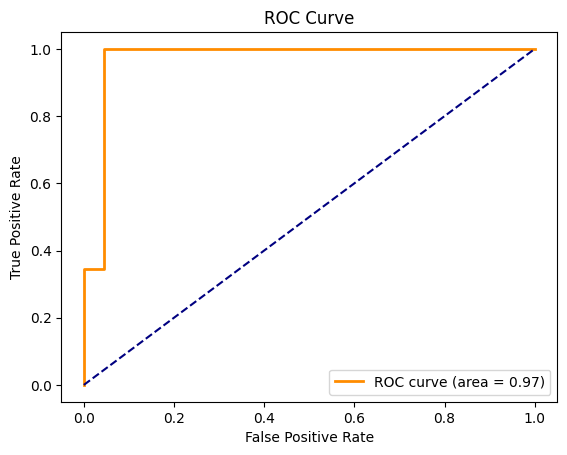

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train['target'])

y_train_pred = gb.predict(X_train)
y_valid_pred = gb.predict(X_valid)
y_test_pred = gb.predict(X_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Set Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"\n{name} Confusion Matrix: ")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

#Print the classification report and confusion matrix
evaluate_model("Train", y_train['target'], y_train_pred)
evaluate_model("Validation", y_valid['target'], y_valid_pred)
evaluate_model("Test", y_test['target'], y_test_pred)

#Print the ROC curve and AUC score
y_test_prob = gb.predict_proba(X_test)[:, 1]
fpr10, tpr10, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = roc_auc_score(y_test['target'], y_test_prob)
plt.plot(fpr10,tpr10, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Model 11: Light Gradient Boosting Machine

[LightGBM] [Info] Number of positive: 422, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 815, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517791 -> initscore=0.071196
[LightGBM] [Info] Start training from score 0.071196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

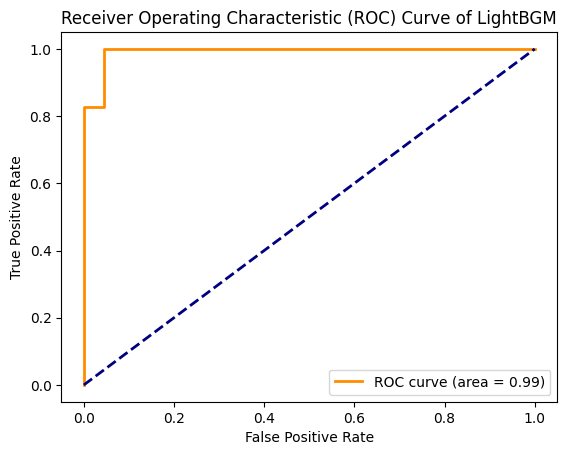

In [ ]:
import lightgbm as lgb

X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_valid.columns = X_valid.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)


lgb_model = lgb.LGBMClassifier(
 boosting_type='gbdt',
    objective='binary',
    n_estimators=100,
    learning_rate=0.06,
    max_depth=4,
    min_child_samples=20,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_alpha=0.7,
    reg_lambda=0.7,
    random_state=42
)

lgb_model.fit(X_train, y_train['target'])

y_train_pred = lgb_model.predict(X_train)
print("\nLightGBM Evaluation for Training Set:\n")
print(classification_report(y_train['target'], y_train_pred))

y_valid_pred= lgb_model.predict(X_valid)
print("\nLightGBM Evaluation for Validation Set:\n")
print(classification_report(y_valid['target'], y_valid_pred))

y_test_pred = lgb_model.predict(X_test)
print("\nLightGBM Evaluation for Testing Set:\n")
print(classification_report(y_test['target'], y_test_pred))

#confusion_matrix
cm= confusion_matrix(y_train['target'],y_train_pred)
print("Confusion Matrix on training set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred)
print("Confusion Matrix on testing set:")
print(cm)

y_test_prob = lgb_model.predict_proba(X_test)[:, 1]
fpr11, tpr11, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = auc(fpr11, tpr11)

# Plot ROC curve
plt.figure()
plt.plot(fpr11, tpr11, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of LightBGM')
plt.legend(loc='lower right')
plt.show()


# Model 12: Adaptive Boosting (AdaBoost)


Adaptive Boosting Evaluation for Training Set:

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       393
         1.0       0.90      0.91      0.90       422

    accuracy                           0.90       815
   macro avg       0.90      0.90      0.90       815
weighted avg       0.90      0.90      0.90       815


Adaptive Boosting Evaluation for Validation Set:

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        56
         1.0       0.82      0.93      0.88        45

    accuracy                           0.88       101
   macro avg       0.88      0.89      0.88       101
weighted avg       0.89      0.88      0.88       101


Adaptive Boosting Evaluation for Testing Set:

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        45
         1.0       0.95      0.91      0.93        58

    accuracy                      

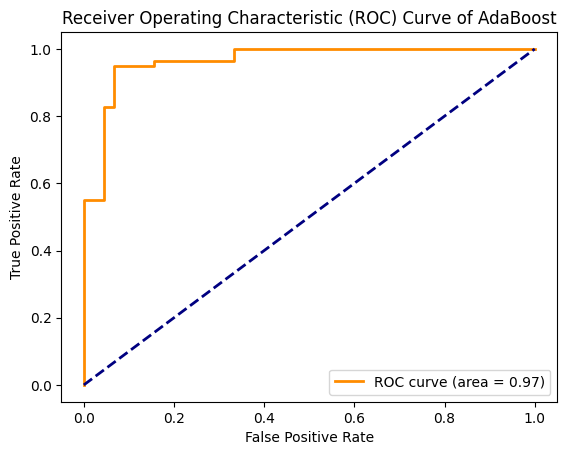

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
adaBoost_model.fit(X_train, y_train['target'])

y_train_pred = adaBoost_model.predict(X_train)
print("\nAdaptive Boosting Evaluation for Training Set:\n")
print(classification_report(y_train['target'], y_train_pred))

y_valid_pred = adaBoost_model.predict(X_valid)
print("\nAdaptive Boosting Evaluation for Validation Set:\n")
print(classification_report(y_valid['target'], y_valid_pred))

y_test_pred = adaBoost_model.predict(X_test)
print("\nAdaptive Boosting Evaluation for Testing Set:\n")
print(classification_report(y_test['target'], y_test_pred))

#confusion_matrix
cm= confusion_matrix(y_train['target'],y_train_pred)
print("Confusion Matrix on training set:")
print(cm)

cm = confusion_matrix(y_valid['target'], y_valid_pred)
print("Confusion Matrix on validation set:")
print(cm)

cm= confusion_matrix(y_test['target'],y_test_pred)
print("Confusion Matrix on testing set:")
print(cm)

y_test_prob = adaBoost_model.predict_proba(X_test)[:, 1]
fpr12, tpr12, thresholds = roc_curve(y_test['target'], y_test_prob)
roc_auc = auc(fpr12, tpr12)

# Plot ROC curve
plt.figure()
plt.plot(fpr12, tpr12, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of AdaBoost')
plt.legend(loc='lower right')
plt.show()


# Multiclass AUC Score and ROC Curve

In [ ]:
auc_score1 = roc_auc_score(y_test['target'], naive_bayes_model.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test['target'], knn_model.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test['target'],best_svm.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test['target'],best_decision_tree.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test['target'],lda_model.predict_proba(X_test)[:, 1])
auc_score6 = roc_auc_score(y_test['target'],qda_model.predict_proba(X_test)[:, 1])
auc_score7 = roc_auc_score(y_test['target'],rf.predict_proba(X_test)[:, 1])
auc_score8 = roc_auc_score(y_test['target'],logReg.predict_proba(X_test)[:, 1])
auc_score9 = roc_auc_score(y_test['target'],nn_model.predict_proba(X_test)[:, 1])
auc_score10 = roc_auc_score(y_test['target'],gb.predict_proba(X_test)[:, 1])
auc_score11 = roc_auc_score(y_test['target'],lgb_model.predict_proba(X_test)[:, 1])
auc_score12 = roc_auc_score(y_test['target'],adaBoost_model.predict_proba(X_test)[:, 1])

print("Multiclass AUC Scores:")
print("Naive Bayes: ",auc_score1)
print("KNN: ",auc_score2)
print("SVM: ",auc_score3)
print("Decision Tree: ",auc_score4)
print("LDA: ",auc_score5)
print("QDA: ",auc_score6)
print("Random Forest: ",auc_score7)
print("Logistic Regression: ",auc_score8)
print("Neural Network: ",auc_score9)
print("Gradient Boosting: ",auc_score10)
print("LightGBM: ",auc_score11)
print("AdaBoost: ",auc_score12)

Multiclass AUC Scores:
Naive Bayes:  0.8885057471264367
KNN:  0.7344827586206897
SVM:  0.9245210727969349
Decision Tree:  0.9827586206896552
LDA:  0.9298850574712644
QDA:  0.939463601532567
Random Forest:  1.0
Logistic Regression:  0.9268199233716474
Neural Network:  0.8977011494252873
Gradient Boosting:  0.9708812260536399
LightGBM:  0.9923371647509578
AdaBoost:  0.9655172413793103


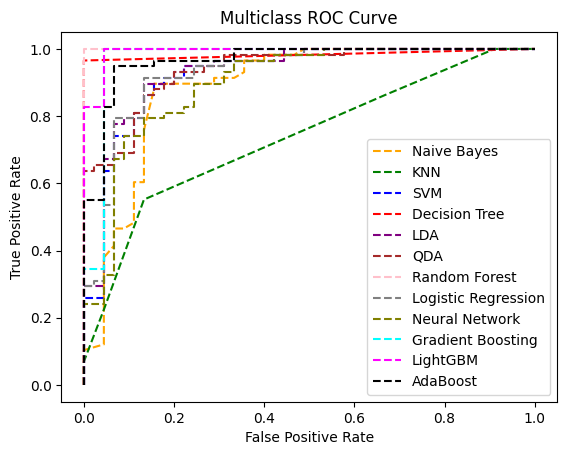

In [ ]:
plt.plot(fpr1,tpr1,linestyle="--",color='orange',label='Naive Bayes')
plt.plot(fpr2,tpr2,linestyle="--",color='green',label='KNN')
plt.plot(fpr3,tpr3,linestyle="--",color='blue',label='SVM')
plt.plot(fpr4,tpr4,linestyle="--",color='red',label='Decision Tree')
plt.plot(fpr5,tpr5,linestyle="--",color='purple',label='LDA')
plt.plot(fpr6,tpr6,linestyle="--",color='brown',label='QDA')
plt.plot(fpr7,tpr7,linestyle="--",color='pink',label='Random Forest')
plt.plot(fpr8,tpr8,linestyle="--",color='gray',label='Logistic Regression')
plt.plot(fpr9,tpr9,linestyle="--",color='olive',label='Neural Network')
plt.plot(fpr10,tpr10,linestyle="--",color='cyan',label='Gradient Boosting')
plt.plot(fpr11,tpr11,linestyle="--",color='magenta',label='LightGBM')
plt.plot(fpr12,tpr12,linestyle="--",color='black',label='AdaBoost')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature Importance

     Feature  Importance
2         cp    0.133326
9    oldpeak    0.110133
11        ca    0.107541
12      thal    0.103305
7    thalach    0.102190
0        age    0.093222
4       chol    0.074591
8      exang    0.066955
3   trestbps    0.063926
10     slope    0.044954
1        sex    0.037553
6    restecg    0.021044
5        fbs    0.007969


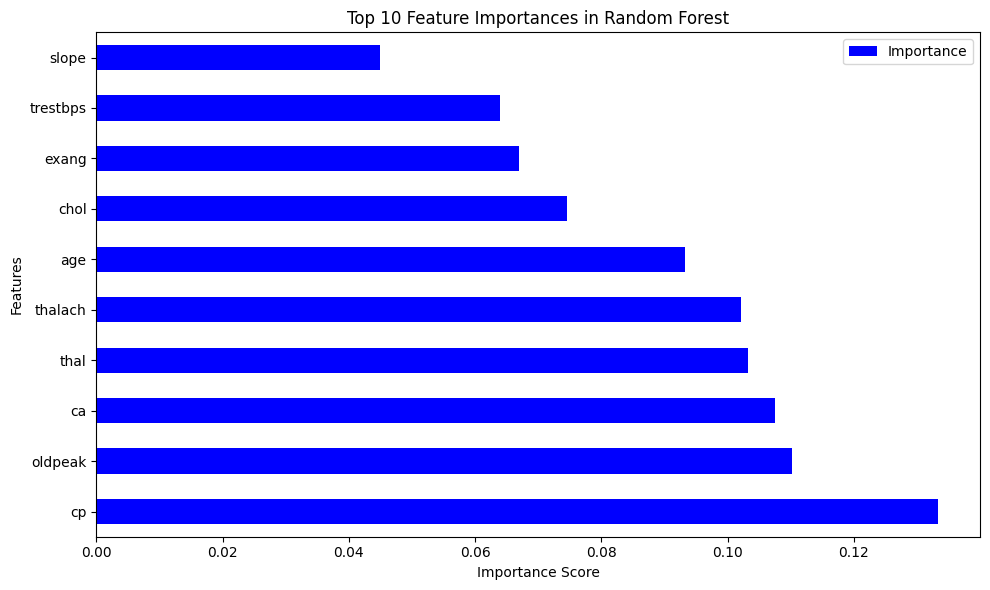

In [ ]:
feature = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ]
f_imp = rf.feature_importances_
f_imp = f_imp[1:]
df = pd.DataFrame({'Feature': feature, 'Importance': f_imp})

df_sorted = df.sort_values(by='Importance', ascending=False)
print(df_sorted)

df_sorted.head(10).plot(kind='barh',  x='Feature', y='Importance', figsize=(10,6), color='blue')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Interaction Part

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

load_rf_model = RandomForestClassifier(random_state=42)
X_train = X_train.drop(X_train.columns[0], axis=1)

load_rf_model.fit(X_train, y_train)

joblib.dump(load_rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
from sklearn import preprocessing
rf_model = joblib.load('random_forest_model.pkl')

scaler = joblib.load("/content/Assignment/scaler.save")

new_data=pd.read_csv("/content/Assignment/HeartNewPatients.csv")

actual_target = new_data['target']
X_new = new_data.drop('target', axis=1)
X_new = scaler.transform(X_new)

predictions = rf_model.predict(X_new).astype(int)

print("Predictions:", predictions[:,1].tolist())
#print actual predictions to see the difference
print("Actual result:", actual_target.tolist())

Predictions: [0, 1, 0, 0, 1, 0, 1, 1, 1, 1]
Actual result: [0, 1, 0, 0, 1, 0, 1, 1, 1, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
